In [3]:
%matplotlib inline

In [1]:
!pip install wordcloud

    100% |████████████████████████████████| 174kB 2.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /home/rasmuserik/.cache/pip/wheels/d9/4c/ac/e63c45f2ce09860e9459a410953039c30296e89d9f7234675f
Successfully built wordcloud


/home/rasmuserik/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


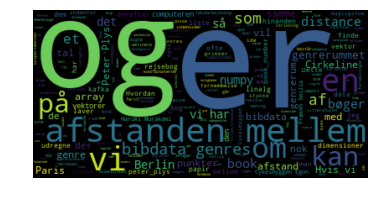

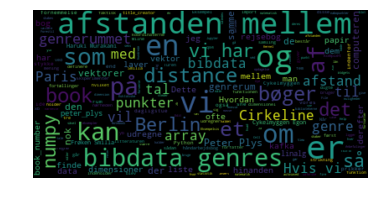

In [2]:
from wordcloud import WordCloud

text = """

Jupyter Notebook
genrerum-1 (autosaved) [Python 3]

Python 3

    File
    Edit
    View
    Insert
    Cell
    Kernel
    Widgets
    Help

Case: Genre-rum

Vi har en idé om, hvad afstanden er mellem to punkter. Hvis vi har to prikker på et stykke papir, så véd vi, hvordan vi måler afstanden mellem dem. Hvis vi har to steder i vores dagligstue, så har vi også en idé om deres afstand.

Hvordan kan vi tale om afstand mellem to bøger? Vi vil nok forvente, at bøger indenfor samme genre ligger tæt på hinanden, eksempler:

    Afstanden mellem "Peter Plys" og "Frøken Smillas fornemmelse for sne" er nok større end afstanden mellem "Cirkeline" og "Cykelmyggen Egon".
    En rejsebog om Berlin er nok tættere på en rejsebog om Paris, end på en håndarbejdsbog.
    Bøger af samme forfatter befinder sig nok i nærheden af hinanden.

Forestil dig, at vi har et genre-rum, hvor der er et punkt for hver eneste bog, og vi kan måle afstanden mellem dem. Dette vil give nye muligheder for at gå på opdagelse i litteraturen. Anbefalinger skabes ved at finde de nærmeste nabopunkter. En genre består af punkter i nærheden af hinanden. Dette gør, at vi kan bruge computeren til at udforske litteraturen.

På papir, i vores dagligstue såvel som i genrerummet, kan afstand defineres matematisk således: Hvis vi har to punkter, a og b, så er afstanden mellem dem √(a−b)2. I én dimension er det afstanden mellem to tal. Eksempel: afstanden mellem 1 og 3 er 2, hvilket kan udregnes som √(1−3)2=√(−2)2=√4=2. I to dimensioner er det afstanden mellem to prikker på et stykke papir, også kaldet den "Euklidiske afstand", √(xa−xb)2+(ya−yb)2. Eksempel: afstanden mellem koordinaterne (1,2) og (4,6) er 5 hvilket vi kan udregne som √(1−4)2+(2−6)2=√32+42=√9+16=√25=5. I tre dimensioner er det afstanden mellem to punkter i rummet, i.e. √(xa−xb)2+(ya−yb)2+(za−zb)2, - og det fortsætter på samme måde i fire, fem, seks, ... dimensioner.

I matematik kalder vi ofte koordinaterne for vektorer. Eksempelvis er en 5-dimensionel vektor, blot en liste af fem tal, og en 100-dimensionel vektor er en liste af hundrede tal.

Hvordan skaber vi et sådan genrerum? Vi har en masse statistik om lån på bibliotekerne. Hvis vi antager, at man ofte låner indenfor samme genre, så kan computeren ud fra disse data udregne et genrerum.

Jeg har udregnet et sådan genrerum for 10.000 biblioteksmaterialer, og i det følgende vil vi undersøge, om afstanden mellem bøger i genrerummet giver mening.
Eksperimenter med afstand mellem bøger

Når vi laver et program, må vi først fortælle computeren, hvilken funktionalitet vi har brug for: bibdata indeholder bibliografiske data, og genrerummet, som jeg har beregnet. numpy indeholder matematikfunktionalitet:

import bibdata

import numpy

I bibdata er der en funktion, som returnerer titel/forfatter, hvis vi kommer med nummeret på et biblioteksmateriale:

bibdata.title_creator(8955)

'Peter Plys : komplet samling fortællinger og digte - A. A. Milne (book)'

Herover ser vi at bog nummer 8955 er "Peter Plys". Ligeledes kan vi se de øvrige bøger, som vi vil eksperimentere med herunder:

[(book_number, bibdata.title_creator(book_number))

   for book_number in [8955, 8214, 616, 580, 149, 278, 126, 29, 688]]

[(8955,
  'Peter Plys : komplet samling fortællinger og digte - A. A. Milne (book)'),
 (8214, 'Frøken Smillas fornemmelse for sne : roman - Peter Høeg (book)'),
 (616, 'Cirkeline bliver til - Hanne Hastrup (book)'),
 (580, 'Cykelmyggen Egon - Flemming Quist Møller (book)'),
 (149, 'Turen går til Berlin - Therkelsen Kirstine (book)'),
 (278, 'Turen går til Paris - Aske Munck (book)'),
 (126, 'Alt om håndarbejdes strikkemagasin -  (other)'),
 (29, '1Q84 - Haruki Murakami (audiobook)'),
 (688, 'Kafka på stranden - Haruki Murakami (book)')]

Disse kan derefter navngives, så de er lettere at arbejde med.

peter_plys = 8955

smilla = 8214

cirkeline = 616

cykelmyggen = 580

berlin = 149

paris = 278

strikning = 126

q84 = 29

kafka = 688

Vi kan finde punktet i genrerummet for en bog via bibdata.genres. Selve genrerummet er 100-dimensionelt, så vektoren består af 100 tal. I programmering kaldes vektorer ofte for arrays.

bibdata.genres[peter_plys]

array([-0.00555056,  0.02921515,  0.02892058, -0.00930832,  0.0100181 ,
        0.02586022,  0.07639047,  0.0186474 , -0.00086742,  0.06219033,
        0.00679732,  0.11657441,  0.10813324, -0.02801489,  0.09085855,
        0.17314938,  0.01396204,  0.00813998,  0.02280807, -0.070943  ,
        0.10048762,  0.19593475,  0.07772335, -0.02303249, -0.02877597,
        0.0482331 ,  0.2106633 ,  0.10839563, -0.06060356,  0.04430847,
        0.00402697,  0.08289498,  0.13924087, -0.27573585,  0.2362854 ,
       -0.06875856,  0.16701048, -0.12419402, -0.092553  , -0.2432362 ,
       -0.04190033,  0.0515306 , -0.13153618,  0.02286854,  0.17851359,
        0.04017429, -0.11496432, -0.19422885, -0.29368186, -0.23722212,
       -0.05779668,  0.11127474, -0.00292388,  0.11682518, -0.04726336,
        0.24068264,  0.11335513, -0.00626563, -0.06929475, -0.06640247,
       -0.02567991, -0.0427829 ,  0.04892466, -0.00911773, -0.04064843,
        0.04555216,  0.02176529,  0.01931233,  0.05836495, -0.05277547,
        0.06144368, -0.05780331, -0.09876966, -0.01271217, -0.03567164,
       -0.01191766,  0.07763795,  0.06327907,  0.05489877,  0.0089579 ,
        0.18206413,  0.07300671,  0.00060291, -0.0095353 , -0.00836633,
       -0.04015189,  0.02045897, -0.05925296, -0.02297055, -0.03071   ,
        0.0417429 ,  0.00575653, -0.08316413, -0.01834758,  0.04315409,
       -0.13101666, -0.01981491, -0.02141316, -0.18829995,  0.07193003])

Som det næste vil vi definere en funktion, distance, som udregner afstanden mellem to punkter/vektorer. Denne bruger funktionen numpy.linalg.norm(v), der udregner √v2. Navnet linalg står for "linær algebra", som er den del af matematikken, der blandt andet handler om at regne med vektorer.

def distance(a, b):

    return numpy.linalg.norm(a - b)

Vi afprøver derefter funktionen ved at finde afstanden mellem (1,2) og (4,6). Dette skal være 5, ligesom vi udregnede tidligere. Her bruger vi numpy.array, som laver en liste af tal om til en vektor, så computeren kan regne på den.

distance(numpy.array([1, 2]), numpy.array([4, 6]))

5.0

Afstanden mellem "Peter Plys" og "Frøken Smilla" er:

distance(bibdata.genres[peter_plys], bibdata.genres[smilla])

1.3247944045025537

Afstanden mellem "Cirkeline" og "Cykelmyggen Egon" er:

distance(bibdata.genres[cirkeline], bibdata.genres[cykelmyggen])

1.0181284635824785

Afstanden mellem rejsebøger om "Berlin" og "Paris" er:

distance(bibdata.genres[berlin], bibdata.genres[paris])

0.25173324294787786

Afstanden mellem rejsebog om "Berlin" og en håndarbejdsbog er:

distance(bibdata.genres[berlin], bibdata.genres[strikning])

1.3969369158183382

Afstanden mellem to bøger af "Haruki Murakami" er:

distance(bibdata.genres[q84], bibdata.genres[kafka])

0.4369157294393759

Konklusionen er, at afstanden mellem bøger i genrerummet faktisk giver mening. De tre forventninger, som jeg formulerede i starten af kapitlet, holder.

Bemærk at forventningerne blev formuleret, før eksperimenterne blev programmeret og kørt. Når man laver data science / videnskabelige eksperimenter, gælder det om først at formulere hypotese, og hvorledes man kan teste den, - og derefter, at udføre testen for, at se om hypotesen faktisk holder.

"""

wordcloud = WordCloud().generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
